In [30]:
"""
inputs: 
prev_close
iep
change
final_price
low_52
all inputs normalised by dividing highest value of the stock in last 52 weeks

output: 
high --> highest value of a stock on a given day

"""

'\ninputs: \nprev_close\niep\nchange\nfinal_price\nlow_52\nall inputs normalised by dividing highest value of the stock in last 52 weeks\n\noutput: \nhigh --> highest value of a stock on a given day\n\n'

In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers, callbacks
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras import models, layers, callbacks
import matplotlib.pyplot as plt


# Read the csv file
df = pd.read_csv('data.csv')
df = df.div(df['high_52'], axis=0)
xs = df.drop(columns=['high_52', 'high']).values.astype(float)
ys = df['high'].values.astype(float)

# Shuffle indices
indices = np.arange(len(xs))
np.random.shuffle(indices)

# Rearrange xs and ys based on shuffled indices
xs_shuffled = xs[indices]
ys_shuffled = ys[indices]

# Perform 80-20 split
train_ratio = 0.8
split_index = int(train_ratio * len(xs_shuffled))

x_train = xs_shuffled[:split_index]
x_test = xs_shuffled[split_index:]
y_train = ys_shuffled[:split_index]
y_test = ys_shuffled[split_index:]



Epoch 1/100


/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2812 - mae: 0.4103 - val_loss: 0.0236 - val_mae: 0.1501 - learning_rate: 0.0010
Epoch 2/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 0.0459 - mae: 0.1722 - val_loss: 0.0097 - val_mae: 0.0922 - learning_rate: 0.0010
Epoch 3/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 0.0330 - mae: 0.1462 - val_loss: 0.0035 - val_mae: 0.0509 - learning_rate: 0.0010
Epoch 4/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 0.0247 - mae: 0.1265 - val_loss: 0.0030 - val_mae: 0.0453 - learning_rate: 0.0010
Epoch 5/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.0199 - mae: 0.1129 - val_loss: 0.0026 - val_mae: 0.0406 - learning_rate: 0.0010
Epoch 6/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.0168 - mae: 0.1038 - val_loss: 0.0028 - val_mae: 0.0429 - learning_rate: 0.0010
Epoch 7/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.0150 - mae: 0.0980 - val_loss: 0.0028 - val_mae: 0.0429 - learning_rate: 0.0010

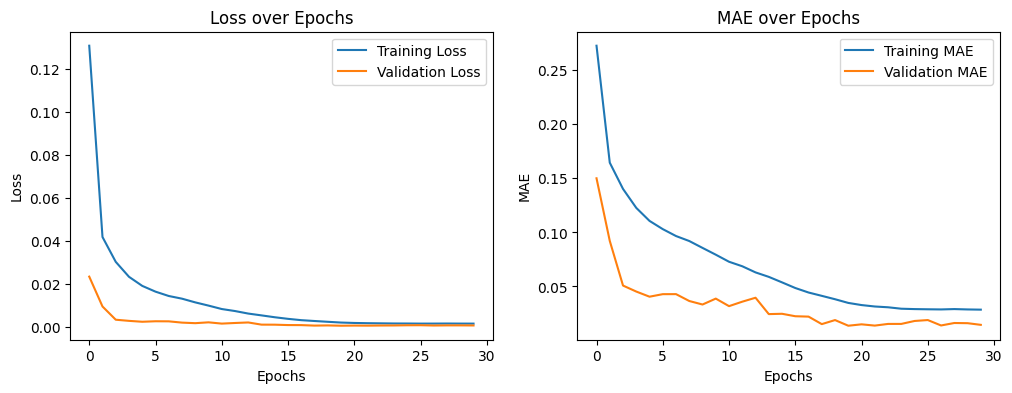

In [32]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Build the model
def build_model(input_shape):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=input_shape))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))
    return model

# Function to compile the model
def compile_model(model):
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Function to plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('MAE over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.show()

# Build and compile the model
model = build_model(input_shape=(5,))
model = compile_model(model)

# Callbacks

# Stop training if val_loss does not improve after 10 epochs. 
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# After 5 epochs without improvement in val_loss reduce learning rate by the factor of 0.2
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Training the model
history = model.fit(
    x_train, 
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


# Evaluating the model
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Mean Absolute Error: {mae}")
# Plot training history
plot_history(history)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step


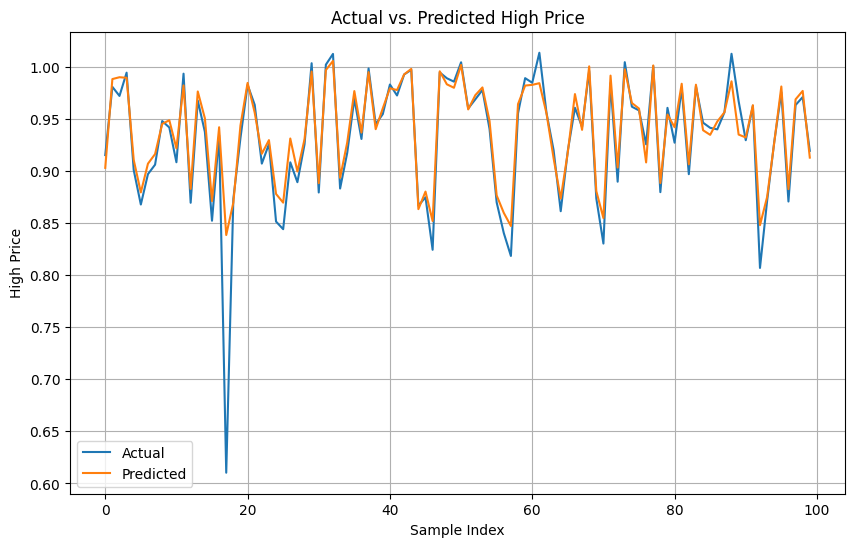

In [33]:
y_pred = model.predict(x_test)
#plotting for first 100 test inputs to see how much it matches
plt.figure(figsize=(10, 6))
plt.plot(y_test[0:100], label='Actual')
plt.plot(y_pred[0:100], label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('High Price')
plt.title('Actual vs. Predicted High Price')
plt.legend()
plt.grid(True)